In this notebook AlexNet (Krizhevsky et al. 'ImageNet Classification with Deep Convolutional Neural Networks') is recreated but for the sake of disk space and computational time it is runned on Horse or Horse dataset. AlexNet consists of 5 convulation layers and 2 dense layers with 3 max pooling layers in between. For network building we use keras.  
### Import libraries

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf
# to display training progress & keep output clean
from IPython.display import clear_output

### Load dataset
Load the data set and define basic data set preprocessing and sampling options.
Uncomment the code below to download ~155GB of data.

In [2]:
dataset_name = 'horses_or_humans'
batch_size = 128
learning_rate = 0.0001

@tf.function
def transform_inp(image, label):
  image = tf.image.resize_with_crop_or_pad(image, 227, 227)
  #image = crop_center(image)
  return tf.cast(image, tf.float32)/255., tf.cast(label, tf.float32)


train_ds = tfds.load(name=dataset_name, split='train', as_supervised=True)
valid_ds = tfds.load(name=dataset_name, split='test', as_supervised=True)          

# prepare data set
train_ds = train_ds.map(transform_inp).shuffle(1024).batch(batch_size)
valid_ds = valid_ds.map(transform_inp).shuffle(1024).batch(batch_size)

### Model
We define our model following AlexNet architecture.

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Let's check the model summary.

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       147840    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       9

### Defining the loss function and compiling the model

Here we define our optimizer, loss function, and necessary metrics.

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              metrics=['accuracy'])

### Plotting function
We define plotting function to investigate training of our model

In [6]:
def plot_conv(hist):                     
    history_dict = hist.history
    train_acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    train_loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    
    fig, axs = plt.subplots(1,2, figsize=(15,5))
    epochs = range(1, len(train_acc) + 1)
    axs[0].plot(epochs, val_loss, 'b', label='Validation loss')
    axs[0].plot(epochs, train_loss, c='orange', label='Training loss')
    axs[0].set_title('Training and validation loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    #axs[0].set_xscale('log')
    axs[0].legend()
    
    axs[1].plot(epochs, val_acc, 'b', label='Validation accuracy')
    axs[1].plot(epochs, train_acc, c='orange', label='Training accuracy')
    axs[1].set_title('Training and validation accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    #axs[1].set_xscale('log')
    axs[1].legend()
    plt.tight_layout()

    print("Final statistics")
    print("Training")
    print("Loss: {:.3f}  Accuracy: {:.3f}".format(train_loss[-1], train_acc[-1]))
    print("Validation")
    print("Loss: {:.3f}  Accuracy: {:.3f}".format(val_loss[-1], val_acc[-1]))

### Training

We train our model for 10 epochs to see how it performs.

Epoch 1/10
9/9 [==============================] - 97s 10s/step - loss: 0.6978 - accuracy: 0.5336 - val_loss: 0.6469 - val_accuracy: 0.5195
Epoch 2/10
9/9 [==============================] - 97s 11s/step - loss: 0.5991 - accuracy: 0.6384 - val_loss: 1.1469 - val_accuracy: 0.6016
Epoch 3/10
9/9 [==============================] - 104s 11s/step - loss: 0.4595 - accuracy: 0.7878 - val_loss: 0.3821 - val_accuracy: 0.8906
Epoch 4/10
9/9 [==============================] - 96s 11s/step - loss: 0.3127 - accuracy: 0.8669 - val_loss: 0.5415 - val_accuracy: 0.8828
Epoch 5/10
9/9 [==============================] - 94s 10s/step - loss: 0.1557 - accuracy: 0.9376 - val_loss: 0.5509 - val_accuracy: 0.8828
Epoch 6/10
9/9 [==============================] - 97s 11s/step - loss: 0.1199 - accuracy: 0.9564 - val_loss: 0.4757 - val_accuracy: 0.8945
Epoch 7/10
9/9 [==============================] - 98s 11s/step - loss: 0.2303 - accuracy: 0.9137 - val_loss: 0.7753 - val_accuracy: 0.8711
Epoch 8/10
9/9 [==========

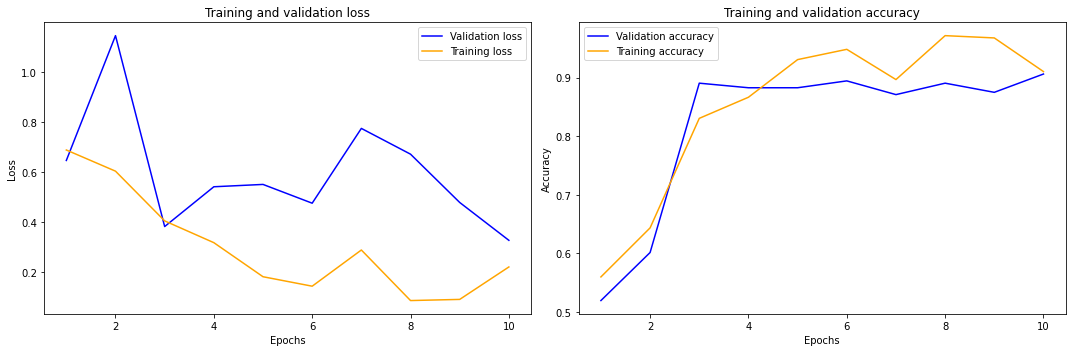

In [7]:
base_hist = model.fit(
    train_ds,
    epochs=10,
    validation_data=valid_ds, 
    verbose = 1
)

plot_conv(base_hist)

In 10 epochs accuracy of over 90% was achived. With better hyperparameters tunning the accuracy could be definetly boosted.